In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(521)
Data = np.linspace(1.0 , 10.0 , num =100) [:, np. newaxis]
Target = np.sin( Data ) + 0.1 * np.power( Data , 2) \
+ 0.5 * np.random.randn(100 , 1)
randIdx = np.arange(100)
np.random.shuffle(randIdx)
trainData, trainTarget = Data[randIdx[:80]], Target[randIdx[:80]]
validData, validTarget = Data[randIdx[80:90]], Target[randIdx[80:90]]
testData, testTarget = Data[randIdx[90:100]], Target[randIdx[90:100]]

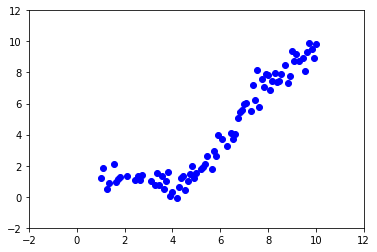

In [6]:
#plot of trainData
plt.plot(trainData, trainTarget, 'bo')
plt.axis([-2,12, -2, 12])
plt.show()

In [7]:
def pairwise_dist(x, z):
    z = tf.transpose(z)
    return tf.squared_difference(x, z)

In [8]:
#testing pairwise_dist function
x = tf.constant([[1],[2],[3],[4]])
z = tf.constant([[1],[2],[3]])
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
print(sess.run(pairwise_dist(x,z)))

[[0 1 4]
 [1 0 1]
 [4 1 0]
 [9 4 1]]


In [359]:
def get_top_k_indices(m, k):
    m = tf.convert_to_tensor(m)
    m = tf.transpose(m)
    values, indices = tf.nn.top_k(-m, k, sorted=True)
    return indices

def get_respon_mat(m, k):
    sess.run(init)
    indices = sess.run(get_top_k_indices(m, k))[0]
    seq = 1 / np.arange(1, k + 1, 1)
    sort_list = sorted(list(zip(indices.tolist(), seq.tolist())))
    indices = list(zip(*sort_list))[0]
    values = list(zip(*sort_list))[1]
    indices = tf.constant(indices)
    values = tf.constant(values)
    #values = tf.convert_to_tensor(values)
    #sess.run(values, indices)
    res = tf.sparse_to_dense(sparse_indices=indices, output_shape=[tf.shape(m)[1]], sparse_values=values)   
    sess.run(init)
    return sess.run(res)

    

In [360]:
get_respon_mat(trainData, 2)

InvalidArgumentError: indices[0] = [5] is out of bounds: need 0 <= index < [1]
	 [[Node: SparseToDense_65 = SparseToDense[T=DT_FLOAT, Tindices=DT_INT32, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Const_183, SparseToDense_65/output_shape, Const_184, SparseToDense_65/default_value)]]

Caused by op 'SparseToDense_65', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-360-84a04bee8cfe>", line 1, in <module>
    get_respon_mat(trainData, 2)
  File "<ipython-input-359-e4c42b8061b0>", line 18, in get_respon_mat
    res = tf.sparse_to_dense(sparse_indices=indices, output_shape=[tf.shape(m)[1]], sparse_values=values)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tensorflow/python/ops/sparse_ops.py", line 535, in sparse_to_dense
    name=name)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_sparse_ops.py", line 1032, in _sparse_to_dense
    validate_indices=validate_indices, name=name)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/lidaiqing/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): indices[0] = [5] is out of bounds: need 0 <= index < [1]
	 [[Node: SparseToDense_65 = SparseToDense[T=DT_FLOAT, Tindices=DT_INT32, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Const_183, SparseToDense_65/output_shape, Const_184, SparseToDense_65/default_value)]]


In [123]:
print(trainData.shape)

(80, 1)


In [314]:
seq = tf.range(1, 10, 1)
seq = tf.divide(1, seq)
sess.run(init)
sess.run(seq)
seq = seq.eval()
a = sorted(list(zip(seq.tolist(),seq.tolist())))
#b = sorted(a)
#ind = ind.tolist()
print(a)
#print(sess.run(tf.sparse_to_dense(sparse_indices=[5,22,62], output_shape=[100], sparse_values=1)))

[(0.1111111111111111, 0.1111111111111111), (0.125, 0.125), (0.14285714285714285, 0.14285714285714285), (0.16666666666666666, 0.16666666666666666), (0.2, 0.2), (0.25, 0.25), (0.3333333333333333, 0.3333333333333333), (0.5, 0.5), (1.0, 1.0)]
